In [127]:
file_path= r"C:\Users\akssen\Downloads\Akshay_ML\A_Project_ML\machine_learning_prj\housing.csv"

In [128]:
import  pandas as pd
df = pd.read_csv(file_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [129]:

df.shape

(20640, 10)

In [130]:
X ,y = df.drop(columns="median_house_value"), df["median_house_value"]

In [131]:
X.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [132]:
x.shape

(20640, 16)

In [133]:
y.shape

(20640,)

In [134]:
num = X.drop(columns="ocean_proximity")
num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [136]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy="most_frequent")

In [137]:
simple_imputer.fit_transform(num)

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  3.2200e+02,
         1.2600e+02,  8.3252e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  2.4010e+03,
         1.1380e+03,  8.3014e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  4.9600e+02,
         1.7700e+02,  7.2574e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.0070e+03,
         4.3300e+02,  1.7000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  7.4100e+02,
         3.4900e+02,  1.8672e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  1.3870e+03,
         5.3000e+02,  2.3886e+00]])

fit,
transform,
fit_transform

In [138]:
df = simple_imputer.transform(num)

In [139]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [140]:
simple_imputer.statistics_

array([-118.31 ,   34.06 ,   52.   , 1527.   ,  280.   ,  891.   ,
        306.   ,    3.125])

In [141]:
# simple_imputer.transform(new_df)

In [142]:
from sklearn.base import BaseEstimator, TransformerMixin

In [143]:
# Custom Transformer sample
class TestGenerator(BaseEstimator, TransformerMixin):
    
    def __init__(self, strategy="median"):
        self.strategy = strategy

    def fit(self, x):
        self.features_ = x.columns
        self.statistics_ = []
        for column in x.columns:
            self.statistics_.append(x[column].median())
        return self

    def transform(self, x: pd.DataFrame):
        for idx, column in enumerate(x.columns):
            x[column].fillna(self.statistics_[idx])
        return x

    # def fit_transform(self, x):
    #     self.transform(x)
    #     return self.transform(x)

In [144]:
response = TestGenerator().fit(num)

In [145]:
response.statistics_

[-118.49, 34.26, 29.0, 2127.0, 435.0, 1166.0, 409.0, 3.5347999999999997]

In [146]:
import numpy as np

In [147]:
COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOMS = "total_bedrooms"

class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        '''
        FeatureGenerator initialization
        add_bedrooms_per_room=bool,
        total_rooms_ix=int index number of total rooms columns,
        population_ix=int index number of total population columns,
        households_ix=int index number of total households columns,
        total_bedrooms_ix=int index number of total bedrooms columns
        '''
        try:
            self.columns= columns
            if self.columns is not None:
                total_rooms_ix= self.columns.index(COLUMN_TOTAL_ROOMS),
                population_ix= self.columns.index(COLUMN_POPULATION),
                households_ix= self.columns.index(COLUMN_HOUSEHOLDS),
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOMS)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix

        except Exception as e:
            raise e
        
    def fit(self, x, y=None):
        return self
    
    def transform(self, x, y =None):
        try:
            rooms_per_household = x[:, self.total_rooms_ix] / x[:, self.households_ix]
            population_per_household = x[:,self.population_ix] / x[:, self.households_ix]
            
            if self.add_bedrooms_per_room:
                bedrooms_per_room = x[:, self.total_bedrooms_ix] / x[:, self.total_rooms_ix]
                generated_feature = np.c_[ x, rooms_per_household, population_per_household, bedrooms_per_room ]
            else:
                generated_feature = np.c_[ x, rooms_per_household, population_per_household ]

            return generated_feature

        except Exception as e:
            raise e

In [148]:
for idx, column in enumerate(X.columns):
    print(idx, column)

0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 ocean_proximity


In [149]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [150]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("featureGenerator", FeatureGenerator(add_bedroom_per_room=True)),
    ("scaling", StandardScaler())
])

In [151]:
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("oneHotEncoder", OneHotEncoder()),
    ("scaling", StandardScaler(with_mean=False)),
])

In [152]:
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

categorical_columns = ['ocean_proximity']

In [153]:
preprocessing = ColumnTransformer([
    ("num_pipeline", num_pipeline, numerical_columns),
    ("cat_pipeline", cat_pipeline, categorical_columns)]
)

In [154]:
df = pd.read_csv(file_path)

In [155]:
preprocessing.fit_transform(df)

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         3.18400629,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         3.18400629,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         3.18400629,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [156]:
import dill

In [157]:
with open('preprocessing.pkl', 'wb') as prep_file:
    dill.dump(preprocessing, prep_file)

In [158]:
with open('preprocessing.pkl', 'rb') as file_obj:
    preprocessing_loaded_obj =dill.load(file_obj)

In [159]:
train_df=preprocessing_loaded_obj.fit_transform(df)
train_df

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         3.18400629,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         3.18400629,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         3.18400629,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [160]:
test_arr=preprocessing_loaded_obj.fit_transform(X_test)
test_arr

array([[ 0.78997856, -0.72390675,  0.49973342, ...,  0.        ,
         0.        ,  0.        ],
       [-0.82567368,  1.01777101, -0.20156204, ...,  0.        ,
         0.        ,  0.        ],
       [-0.78134175,  1.37162111, -0.9028575 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.02763021,  1.36702565, -0.51324891, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.60279933, -0.67795219, -0.74701406, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85401355, -0.87096134, -0.20156204, ...,  0.        ,
         0.        ,  0.        ]])

In [161]:
train_df.shape

(20640, 16)

In [162]:
x=train_df
y= np.array(df.median_house_value)
y
y.shape

(20640,)

In [163]:
# preprocessing_loaded_obj.fit_transform(new_df)

In [164]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [165]:
lr.fit(x,y)

LinearRegression()

In [166]:
lr.fit_intercept

True

In [167]:
lr.coef_

array([-5.53206953e+04, -5.62551365e+04,  1.33647377e+04, -1.88243818e+03,
        7.46523942e+03, -4.63319668e+04,  4.57523831e+04,  7.47913203e+04,
        6.37210106e+03,  8.63338384e+02,  9.61322153e+03, -1.28202879e+13,
       -1.20140429e+13, -4.01682148e+11, -8.10645676e+12, -8.64553314e+12])

In [168]:
lr.intercept_

25811009555252.45

In [169]:
y_hat = lr.predict(x)

In [170]:
import matplotlib.pyplot as plt

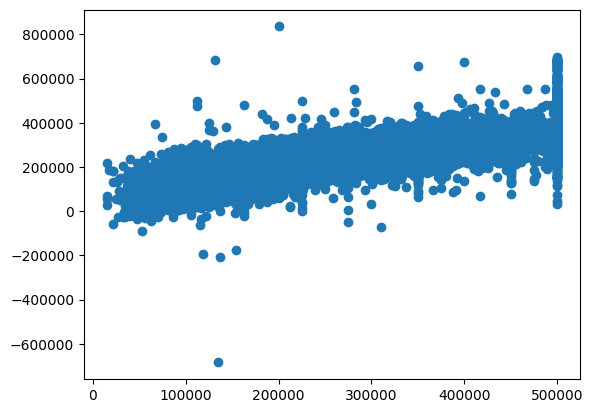

In [171]:

plt.plot(y, y_hat, "o")

In [172]:
from sklearn.metrics import r2_score

In [173]:
r2_score(y, y_hat)

0.649807069091435

In [174]:
yhat_test = lr.predict(test_arr)

In [177]:
ytest = np.array(test_df.median_house_value)

AttributeError: 'numpy.ndarray' object has no attribute 'median_house_value'

In [179]:
# r2_score(y_test, yhat_test)